<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Calculate-DEER-traces-analytically-and-numerically" data-toc-modified-id="Calculate-DEER-traces-analytically-and-numerically-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Calculate DEER traces analytically and numerically</a></span></li><li><span><a href="#Numerical-calculation" data-toc-modified-id="Numerical-calculation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Numerical calculation</a></span></li><li><span><a href="#Comparison" data-toc-modified-id="Comparison-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Comparison</a></span></li></ul></div>

In [1]:
import bioen_rotamer as br

%matplotlib inline

/home/tb/lustelzl/.local/lib/python2.7/site-packages/MDAnalysis/due.py:88: UserWarning: No module named duecredit
  warnings.warn(str(err))


## Calculate DEER traces analytically and numerically

In the following we test the analytical calculation of DEER traces via Fresnel integrals by comparison to numerical calculation.

## Numerical calculation

In [2]:
def distances2signal(distances, exp_ts, step=0.01):
    """
    Numerically calculate DEER time traces
    
    Parameters
    ----------
    d: array 
       Spin-spin distances [A] for N structures
    t: array
       Time points [ns], M time points to be calculated
    step: float
       Integration step
    
    Returns
    -------
    vt: array
        DEER/PELDOR time trace  
    """
        
    dTip = 52.04  # 10^6 s^-1 nm^3                                                                                      
    xs   = np.arange(0.0, 1.0+step, step=step)
    sim_signal = []
    for ts in exp_ts:
        signal = []
        for r in distances:
            y = []
            for x in xs:
                # c.f. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3111319/
                dip  = np.cos( 2 * np.pi * (1 - 3 * x**2) * dTip * ts / r **3)
                y.append(dip)
            signal.append(np.mean(y))
        sim_signal.append([ts, np.mean(signal)])
    return  np.array(sim_signal)

## Comparison

In [3]:
dist_ar = np.array([[4.0]])

t_pts = np.arange(0,2000)

In [4]:
# Note that the function wants distances in Angstrom 
%time v_num = distances2signal(dist_ar*10., t_pts, step=0.001)

CPU times: user 12.3 s, sys: 0 ns, total: 12.3 s
Wall time: 12.3 s


In [5]:
# Distances in nm
%time v_analytical = br.deer_ft(dist_ar, t_pts)

CPU times: user 2.28 ms, sys: 0 ns, total: 2.28 ms
Wall time: 1.67 ms


bioen_rotamer.py:142: RuntimeWarning: invalid value encountered in divide
  F_vmu = (cos_f * np.cos(np.pi/6.*x**2) + sin_f * np.sin(np.pi/6.*x**2)) / x


In [6]:
v_analytical

array([[        nan,  0.99998956,  0.99995824, ..., -0.14386553,
        -0.14383326, -0.14379854]])

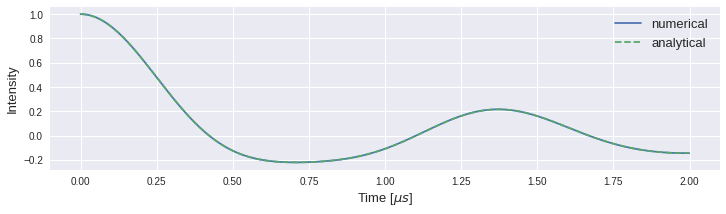

In [7]:
fig, ax = plt.subplots(figsize=(12,3))
plt.plot(t_pts/ 1000., v_num[:,1], label="numerical")
plt.plot(t_pts/ 1000., v_analytical.T, "--",
         label="analytical")
ax.set_xlabel("Time [$\mu s$]", fontsize=13)
ax.set_ylabel(r"Intensity", fontsize=13)
ax.legend(fontsize=13)